# Análisis exploratorio de incidencia delictiva en México

In [1]:
import pandas as pd

In [5]:
df_delitos = pd.read_csv('data/datos_delitos.csv', encoding='latin-1')

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

In [6]:
df_delitos.head()

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,1,1,1,2.0,1.0,2.0,2.0,2.0,1.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,2,2,3,2,0.0,1.0,2.0,0.0,0.0,0.0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,2,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?

In [7]:
import matplotlib.pyplot as plt

#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

In [8]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
colima_2018 = df_delitos[(df_delitos['Entidad'] == 'Colima') & 
                         (df_delitos['Año'] == 2018) & 
                         (df_delitos['Subtipo de delito'] == 'Homicidio doloso')]

colima_2018

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
9898,2018,6,Colima,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,43,41,45,35,28,42,32.0,37.0,40.0,56.0,41.0,37.0
9899,2018,6,Colima,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,10,4,4,7,12,0,2.0,7.0,3.0,3.0,6.0,7.0
9900,2018,6,Colima,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,1,4,3,4,6,10,6.0,3.0,8.0,10.0,6.0,4.0
9901,2018,6,Colima,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,2,2,0,0,3,0,1.0,2.0,0.0,0.0,0.0,0.0


---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [ ]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})
pobs.head()

In [9]:
# Sumamos todos los meses de la fila que encontramos
total_homicidios = colima_2018[meses].sum(axis=1)

# Mostramos el resultado final
total_homicidios

9898    477.0
9899     65.0
9900     65.0
9901     10.0
dtype: float64

In [10]:
# Buscamos todos los robos de coche del año 2019
robos_2019 = df_delitos[(df_delitos['Año'] == 2019) & 
                        (df_delitos['Subtipo de delito'] == 'Robo de vehículo automotor')]

# Mostramos las primeras filas para ver que todo esté bien
robos_2019.head()

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
12585,2019,1,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,5,4,8,14,2,3,12.0,8.0,6.0,3.0,6.0,4.0
12586,2019,1,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,182,149,149,128,144,118,86.0,85.0,99.0,97.0,159.0,171.0
12587,2019,1,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Con violencia,1,3,2,3,2,3,1.0,1.0,4.0,4.0,3.0,3.0
12588,2019,1,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de motocicleta Sin violencia,79,72,59,68,50,65,53.0,66.0,46.0,59.0,51.0,59.0
12589,2019,1,Aguascalientes,El patrimonio,Robo,Robo de vehículo automotor,Robo de embarcaciones pequeñas y grandes Con v...,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Sumamos todos los meses de todas las filas que encontramos
total_robos = robos_2019[meses].sum().sum()

# Mostramos el resultado
print("El total de robos de vehículo en 2019 fue:", total_robos)

El total de robos de vehículo en 2019 fue: 187661.0


In [12]:
# Creamos una lista con los dos delitos que nos piden
lista_delitos = ['Homicidio doloso', 'Feminicidio']

# Filtramos la tabla original para quedarnos solo con esos dos
df_p3 = df_delitos[df_delitos['Subtipo de delito'].isin(lista_delitos)].copy()

# Vemos si se filtraron bien
df_p3.head()

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,3,0,2,1,1,1,2.0,1.0,2.0,2.0,2.0,1.0
1,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1,0,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0
2,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0,2,2,3,2,0.0,1.0,2.0,0.0,0.0,0.0
3,2015,1,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,2,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
18,2015,1,Aguascalientes,La vida y la Integridad corporal,Feminicidio,Feminicidio,Con arma de fuego,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# 1. Creamos una columna nueva que suma todos los meses por cada fila
df_p3['Suma_Fila'] = df_p3[meses].sum(axis=1)

# 2. Agrupamos por 'Año' y sumamos esos totales
resultado_final = df_p3.groupby('Año')['Suma_Fila'].sum()

# 3. Mostramos el resultado
resultado_final

Año
2015    16532.0
2016    20756.0
2017    25777.0
2018    29995.0
2019    30445.0
2020    29786.0
2021    29263.0
2022    27240.0
2023    26119.0
2024    13255.0
Name: Suma_Fila, dtype: float64

In [14]:
# Buscamos todas las filas que sean de Feminicidio
df_fem = df_delitos[df_delitos['Subtipo de delito'] == 'Feminicidio']

# Revisamos las primeras filas
df_fem.head()

,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
18,2015,1,Aguascalientes,La vida y la Integridad corporal,Feminicidio,Feminicidio,Con arma de fuego,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
19,2015,1,Aguascalientes,La vida y la Integridad corporal,Feminicidio,Feminicidio,Con arma blanca,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
20,2015,1,Aguascalientes,La vida y la Integridad corporal,Feminicidio,Feminicidio,Con otro elemento,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
21,2015,1,Aguascalientes,La vida y la Integridad corporal,Feminicidio,Feminicidio,No especificado,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
116,2015,2,Baja California,La vida y la Integridad corporal,Feminicidio,Feminicidio,Con arma de fuego,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# 1. Buscamos el número más alto en todas las columnas de meses
max_valor = df_fem[meses].max().max()

# 2. Identificamos en qué mes (columna) está ese número
mes_maximo = df_fem[meses].max().idxmax()

print("El número más alto de feminicidios fue:", max_valor)
print("Sucedió en el mes de:", mes_maximo)

El número más alto de feminicidios fue: 16.0
Sucedió en el mes de: Abril


In [16]:
# Buscamos la fila que tiene ese valor máximo en ese mes
registro_maximo = df_fem[df_fem[mes_maximo] == max_valor]

# Mostramos el Estado, el Año y el Mes para confirmar
registro_maximo[['Año', 'Entidad', mes_maximo]]

,Año,Entidad,Abril
12270,2018,Veracruz de Ignacio de la Llave,16


In [17]:
# 1. Creamos una columna con la suma de todos los meses para cada fila
df_fem['Total_Anual'] = df_fem[meses].sum(axis=1)

# 2. Revisamos que se haya creado la columna con los totales
df_fem[['Año', 'Entidad', 'Total_Anual']].head()

C:\Users\resid\AppData\Local\Temp\ipykernel_22848\2040165758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fem['Total_Anual'] = df_fem[meses].sum(axis=1)


,Año,Entidad,Total_Anual
18,2015,Aguascalientes,0.0
19,2015,Aguascalientes,0.0
20,2015,Aguascalientes,0.0
21,2015,Aguascalientes,0.0
116,2015,Baja California,1.0


In [18]:
# 1. Buscamos el valor más alto en la columna de totales anuales
max_anual = df_fem['Total_Anual'].max()

# 2. Buscamos la fila que tiene ese número
estado_record = df_fem[df_fem['Total_Anual'] == max_anual]

# 3. Mostramos el resultado
estado_record[['Año', 'Entidad', 'Total_Anual']]

,Año,Entidad,Total_Anual
20208,2021,México,108.0


In [19]:
# 1. Creamos una columna 'Total' en el dataframe original para no repetir sumas
df_delitos['Total'] = df_delitos[meses].sum(axis=1)

# 2. Agrupamos los datos para saber cuánto hubo de cada delito por año
datos_grafica = df_delitos.groupby(['Año', 'Tipo de delito'])['Total'].sum().unstack()

# 3. Revisamos cómo quedó nuestra tabla para graficar
datos_grafica

Tipo de delito,Aborto,Abuso de confianza,Abuso sexual,Acoso sexual,Allanamiento de morada,Amenazas,Contra el medio ambiente,Corrupción de menores,Daño a la propiedad,Delitos cometidos por servidores públicos,...,Otros delitos que atentan contra la vida y la integridad corporal,Rapto,Robo,Secuestro,Trata de personas,Tráfico de menores,Violación equiparada,Violación simple,Violencia de género en todas sus modalidades distinta a la violencia familiar,Violencia familiar
Año,,,,,,,,,,,,,,,,,,,,,
2015,544.0,20013.0,11980.0,1109.0,12326.0,68007.0,1184.0,1940.0,120246.0,11821.0,...,3122.0,271.0,652647.0,1062.0,415.0,96.0,2081.0,10538.0,1645.0,127424.0
2016,562.0,20796.0,15108.0,1325.0,13332.0,76294.0,1449.0,1873.0,123083.0,13491.0,...,3915.0,254.0,690048.0,1128.0,383.0,203.0,2547.0,11002.0,1893.0,154272.0
2017,545.0,24424.0,15899.0,1700.0,13096.0,82682.0,1807.0,1851.0,129390.0,15164.0,...,5141.0,204.0,801099.0,1149.0,304.0,176.0,2734.0,10786.0,2142.0,169579.0
2018,605.0,24741.0,18875.0,2712.0,12804.0,89788.0,2120.0,1848.0,132692.0,18332.0,...,7231.0,119.0,810592.0,1330.0,393.0,40.0,2962.0,12360.0,2255.0,180185.0
2019,716.0,27454.0,23661.0,4221.0,14101.0,110092.0,2192.0,2185.0,135779.0,21523.0,...,8488.0,116.0,766096.0,1330.0,546.0,29.0,3677.0,13665.0,3180.0,210189.0
2020,633.0,24719.0,22377.0,5596.0,12715.0,104339.0,1982.0,2443.0,116479.0,21883.0,...,10453.0,128.0,604275.0,833.0,558.0,21.0,4225.0,12318.0,4050.0,220028.0
2021,703.0,30497.0,27718.0,7060.0,13874.0,119891.0,2095.0,2602.0,137986.0,21520.0,...,12548.0,126.0,609271.0,628.0,625.0,29.0,5976.0,15213.0,4186.0,253740.0
2022,819.0,31032.0,33359.0,10977.0,14315.0,135713.0,2335.0,2950.0,148315.0,21024.0,...,12959.0,99.0,609635.0,506.0,805.0,13.0,7455.0,15646.0,5524.0,270544.0
2023,810.0,31089.0,35917.0,13819.0,14708.0,140430.0,2355.0,2835.0,150883.0,20854.0,...,13985.0,75.0,581510.0,463.0,729.0,12.0,7109.0,15622.0,6406.0,284203.0


In [ ]:
# 1. Definimos cuántos años tenemos para saber cuántas gráficas hacer
anios = datos_grafica.index

# 2. Creamos una cuadrícula (4 filas y 2 columnas para que quepan bien los 7-8 años)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
axes = axes.flatten() # Esto facilita colocar cada gráfica en su lugar

# 3. Usamos un "ciclo" para dibujar cada año automáticamente
for i, anio in enumerate(anios):
    datos_grafica.loc[anio].plot(kind='pie', 
                                 ax=axes[i], 
                                 autopct='%1.1f%%', 
                                 startangle=90, 
                                 textprops={'fontsize': 10})
    axes[i].set_title(f'Distribución de Delitos - Año {anio}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('') # Quitamos el texto lateral para que se vea más limpio

# 4. Ajustamos el espacio y borramos los cuadros vacíos si sobran
plt.tight_layout()
plt.show()

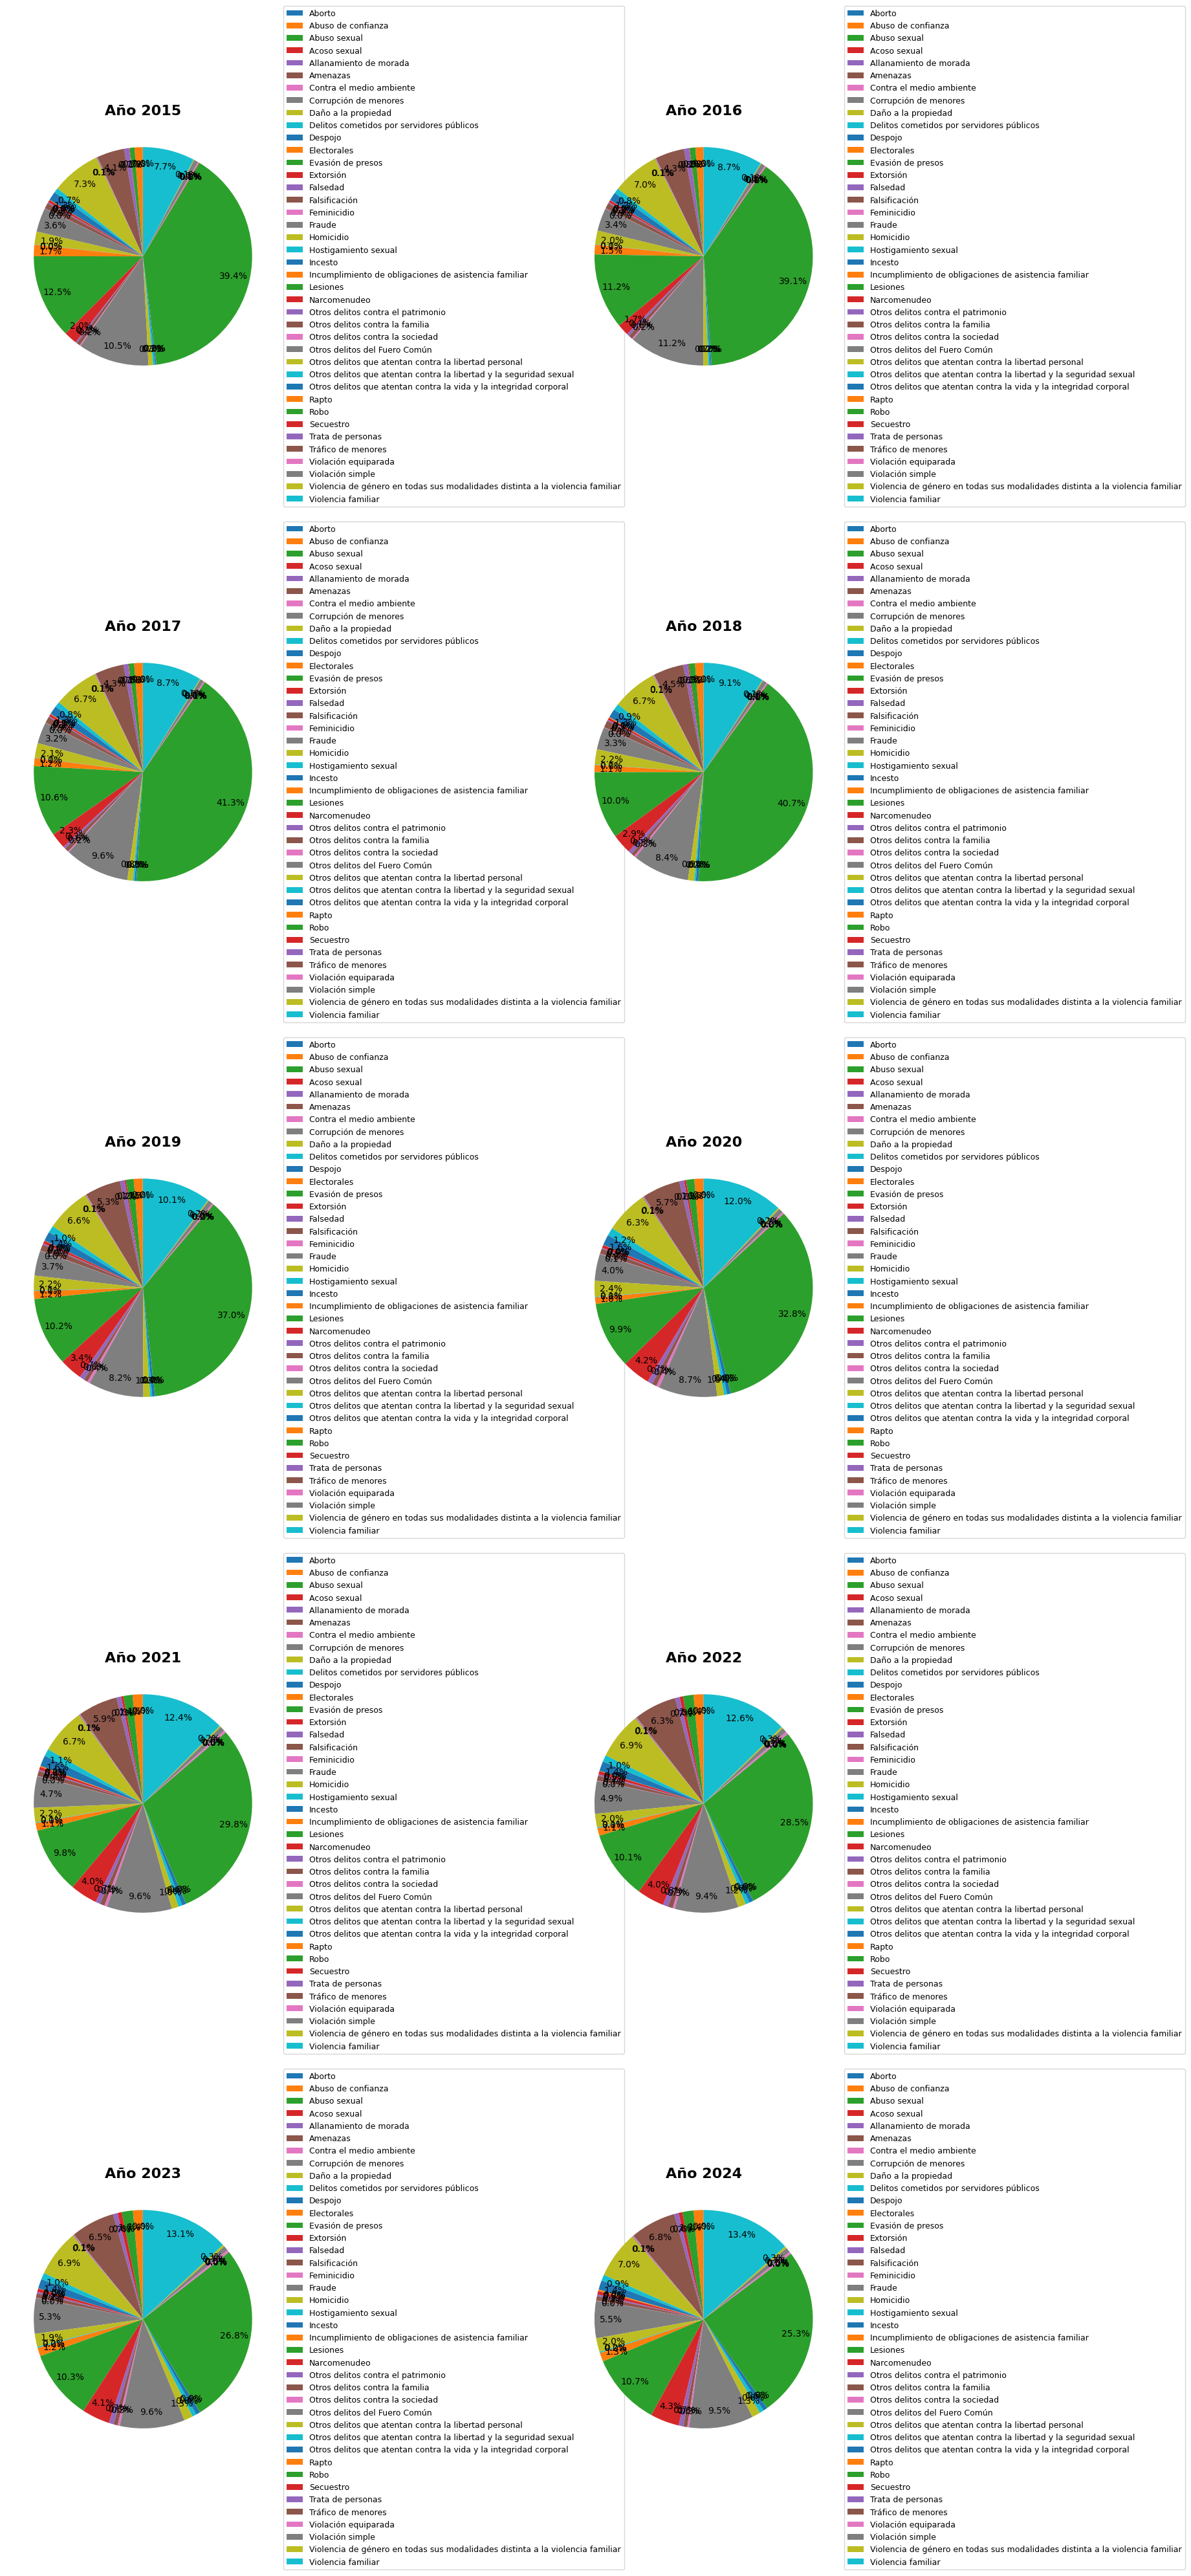

In [22]:
import math

anios = datos_grafica.index
n_anios = len(anios)
columnas = 2
filas = math.ceil(n_anios / columnas)

fig, axes = plt.subplots(nrows=filas, ncols=columnas, figsize=(18, filas * 8))
axes = axes.flatten()

for i, anio in enumerate(anios):
    # 'labels=None' quita los nombres de las rebanadas para que no se encimen
    datos_grafica.loc[anio].plot(kind='pie', 
                                 ax=axes[i], 
                                 autopct='%1.1f%%', 
                                 startangle=90, 
                                 labels=None, 
                                 pctdistance=0.85)
    
    axes[i].set_title(f'Año {anio}', fontsize=16, fontweight='bold')
    axes[i].set_ylabel('')
    
    # Agregamos la leyenda a un lado de cada círculo
    axes[i].legend(datos_grafica.columns, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=9)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [23]:
# Cargamos el archivo de población
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")

# Seleccionamos solo las columnas que nos interesan
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]

# Renombramos las columnas para que sea más fácil trabajar
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})

# Vemos cómo quedó la tabla
pobs.head()

,clave_entidad,entidad,poblacion
0,1,Aguascalientes,1312544.0
1,2,Baja California,3315766.0
2,3,Baja California Sur,712029.0
3,4,Campeche,899931.0
4,5,Coahuila de Zaragoza,5217908.0


In [24]:
# 1. Cargamos el archivo de población (ojo con los separadores y el encoding)
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")

# 2. Limpiamos un poco los nombres para que coincidan
pobs = pobs.rename(columns={'Entidad': 'Entidad_Pob'})

# 3. Unimos los delitos con la población usando el nombre del Estado
# Nota: Asegúrate de que tu tabla de delitos se llame 'df_delitos'
df_tasas = pd.merge(df_delitos, pobs, left_on='Entidad', right_on='Entidad_Pob')

# 4. Revisamos que ahora cada fila tenga su columna de 'Poblacion'
df_tasas[['Año', 'Entidad', 'Poblacion']].head()

,Año,Entidad,Poblacion
0,2015,Aguascalientes,1312544.0
1,2015,Aguascalientes,1312544.0
2,2015,Aguascalientes,1312544.0
3,2015,Aguascalientes,1312544.0
4,2015,Aguascalientes,1312544.0


In [ ]:
# 1. Calculamos la tasa por cada 100,000 habitantes
# Usamos la columna 'Total' que creamos anteriormente
df_tasas['Tasa'] = (df_tasas['Total'] / df_tasas['poblacion']) * 100000

# 2. Calculamos la tasa anualizada (multiplicando por 12 meses)
df_tasas['Tasa_Anualizada'] = df_tasas['Tasa'] * 12

# 3. Mostramos los resultados de los primeros estados
df_tasas[['Año', 'Entidad', 'Total', 'poblacion', 'Tasa', 'Tasa_Anualizada']].head()

In [26]:
# 1. Cargamos de nuevo el archivo de población
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")

# 2. Renombramos las columnas para que NO haya errores (todo en minúsculas)
pobs = pobs.rename(columns={'Entidad': 'Entidad_Pob', 'Poblacion': 'poblacion'})

# 3. Unimos las tablas
df_tasas = pd.merge(df_delitos, pobs, left_on='Entidad', right_on='Entidad_Pob')

# 4. Hacemos los cálculos (ahora sí encontrará 'poblacion' en minúsculas)
df_tasas['Tasa'] = (df_tasas['Total'] / df_tasas['poblacion']) * 100000
df_tasas['Tasa_Anualizada'] = df_tasas['Tasa'] * 12

# 5. Mostramos el resultado
df_tasas[['Año', 'Entidad', 'Total', 'poblacion', 'Tasa', 'Tasa_Anualizada']].head()

,Año,Entidad,Total,poblacion,Tasa,Tasa_Anualizada
0,2015,Aguascalientes,18.0,1312544.0,1.371383,16.456591
1,2015,Aguascalientes,5.0,1312544.0,0.380940,4.571275
2,2015,Aguascalientes,12.0,1312544.0,0.914255,10.971061
3,2015,Aguascalientes,3.0,1312544.0,0.228564,2.742765
4,2015,Aguascalientes,1.0,1312544.0,0.076188,0.914255


In [27]:
# Ordenamos la tabla de mayor a menor según la Tasa
top_incidencia = df_tasas.sort_values(by='Tasa', ascending=False)

# Mostramos solo los 5 estados/delitos más altos
top_incidencia[['Año', 'Entidad', 'Tipo de delito', 'Tasa', 'Tasa_Anualizada']].head(5)

,Año,Entidad,Tipo de delito,Tasa,Tasa_Anualizada
25953,2023,Ciudad de México,Violencia familiar,5283.485768,63401.829213
22817,2022,Ciudad de México,Violencia familiar,5205.593088,62467.117057
19681,2021,Ciudad de México,Violencia familiar,4899.646390,58795.756677
7130,2017,Ciudad de México,Robo,4612.399559,55348.794702
10266,2018,Ciudad de México,Robo,4248.103651,50977.243808


In [28]:
# 1. Sumamos el total de cada tipo de delito y lo ordenamos de mayor a menor
resumen_delitos = df_delitos.groupby('Tipo de delito')['Total'].sum().sort_values(ascending=False)

# 2. Vemos los resultados antes de graficar
resumen_delitos

Tipo de delito
Robo                                                                             6396671.0
Violencia familiar                                                               2013609.0
Lesiones                                                                         1957727.0
Otros delitos del Fuero Común                                                    1761301.0
Daño a la propiedad                                                              1269324.0
Amenazas                                                                          999762.0
Fraude                                                                            770699.0
Narcomenudeo                                                                      617655.0
Homicidio                                                                         391488.0
Despojo                                                                           259377.0
Abuso de confianza                                                         

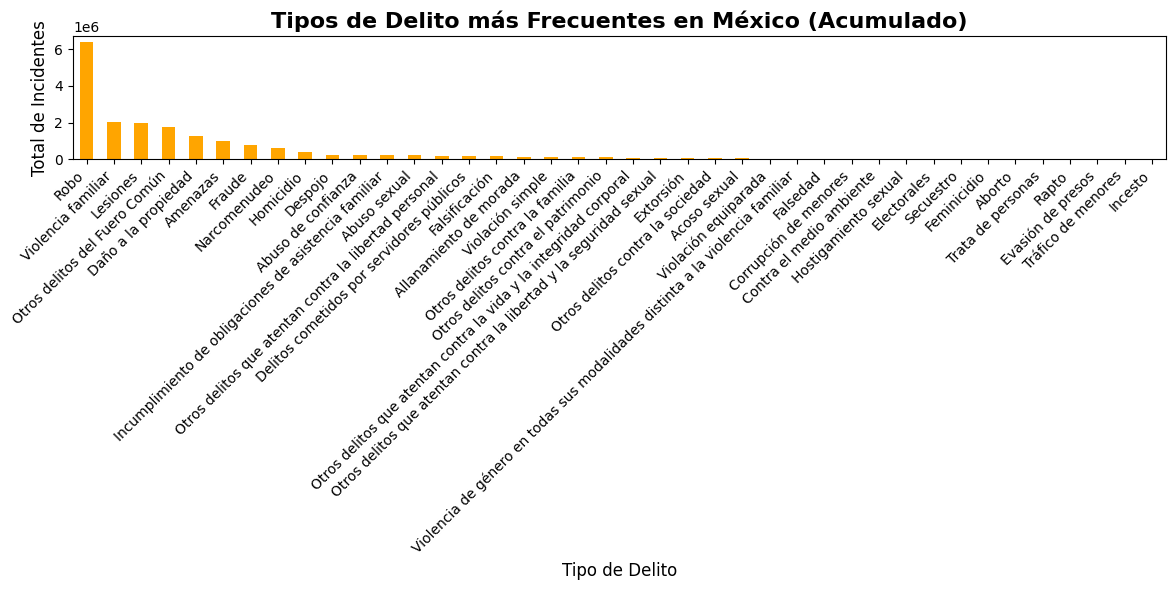

In [29]:
# 1. Configuramos el tamaño de la imagen
plt.figure(figsize=(12, 6))

# 2. Creamos la gráfica de barras
resumen_delitos.plot(kind='bar', color='orange')

# 3. Agregamos títulos y etiquetas para que se entienda
plt.title('Tipos de Delito más Frecuentes en México (Acumulado)', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Delito', fontsize=12)
plt.ylabel('Total de Incidentes', fontsize=12)

# 4. Rotamos los nombres para que no se encimen
plt.xticks(rotation=45, ha='right')

# 5. Mostramos la gráfica
plt.tight_layout()
plt.show()

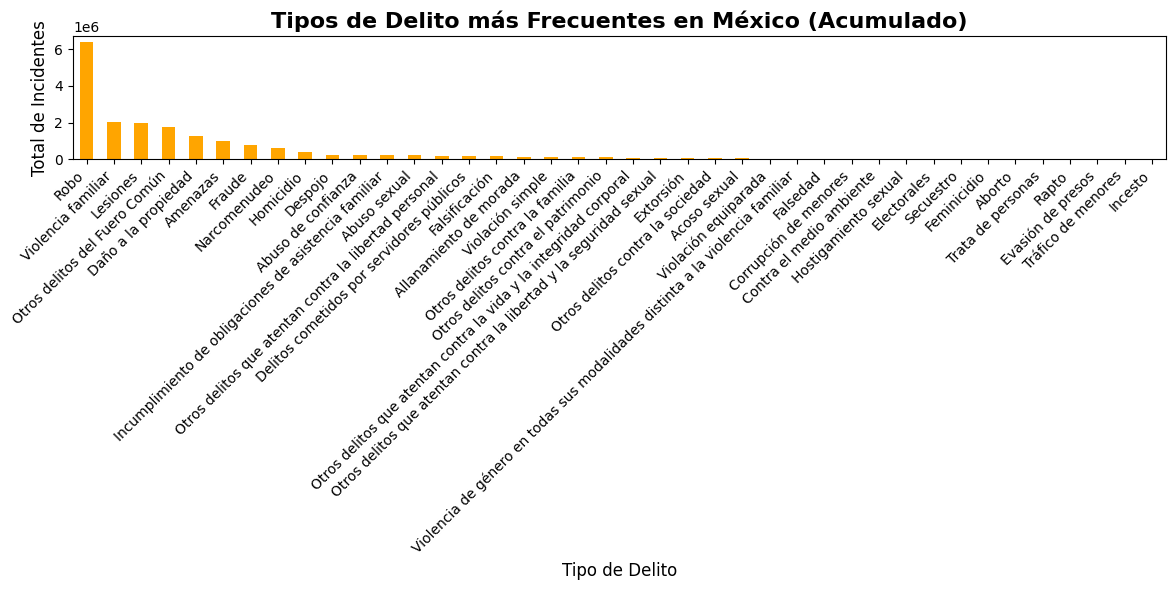

In [30]:
# 1. Configuramos el tamaño de la imagen
plt.figure(figsize=(12, 6))

# 2. Creamos la gráfica de barras
resumen_delitos.plot(kind='bar', color='orange')

# 3. Agregamos títulos y etiquetas para que se entienda
plt.title('Tipos de Delito más Frecuentes en México (Acumulado)', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Delito', fontsize=12)
plt.ylabel('Total de Incidentes', fontsize=12)

# 4. Rotamos los nombres para que no se encimen
plt.xticks(rotation=45, ha='right')

# 5. Mostramos la gráfica
plt.tight_layout()
plt.show()

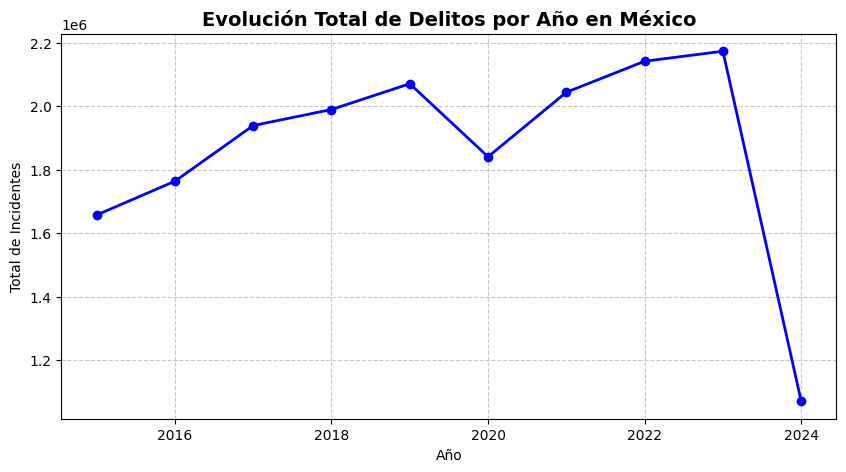

In [31]:
# 1. Agrupamos todos los delitos por año
tendencia_anual = df_delitos.groupby('Año')['Total'].sum()

# 2. Creamos la gráfica de línea
plt.figure(figsize=(10, 5))
tendencia_anual.plot(kind='line', marker='o', color='blue', linewidth=2)

# 3. Detalles visuales
plt.title('Evolución Total de Delitos por Año en México', fontsize=14, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Total de Incidentes')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [32]:
# Guardamos los resultados finales en un archivo CSV
df_tasas.to_csv('reporte_final_delitos_mexico.csv', index=False)

print("¡Tu reporte ha sido guardado como 'reporte_final_delitos_mexico.csv'!")

¡Tu reporte ha sido guardado como 'reporte_final_delitos_mexico.csv'!
